<a href="https://colab.research.google.com/github/WojciechMojsiejuk/Artificial_Intelligence_SEOULTECH/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment #2

* Release date: 2022.10.11 Tue
* Due date: **2022.10.18 Tue 23:59** (will not accept late submission)
* Submission format: notebook file which can be executed in Colab environment
* Weighting: 5% (total 50 pts)
* You will build a multi-class classification model using Reuters dataset.

> ### Loading and preprocessing data

In [12]:
from tensorflow.keras.datasets import reuters

# Like IMDB, the argument num_words restricts the data to 
# the 10,000 most frequently occurring words 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


* (10pts) Write the codes for preprocessing data
  * For inputs, the data we have should be converted to binary vectors.
  * For labels, determine an appropriate format by referring to the arguments of model.compile function below.

```python
model.add(layers.Dense(46, activation='softmax'))
[...]
loss='sparse_categorical_crossentropy'
```
> we can see that last-layer activation function is **softmax**, while loss function is set to **categorical crossentropy** Based on Table 4.1 problem type is **multiclass, single-label classification**.

Because our ```model.compile``` uses sparse categorical crossentropy we don't need to encode our labels to one-hot encoding and can leave them as integers. [source](https://stats.stackexchange.com/a/420730)

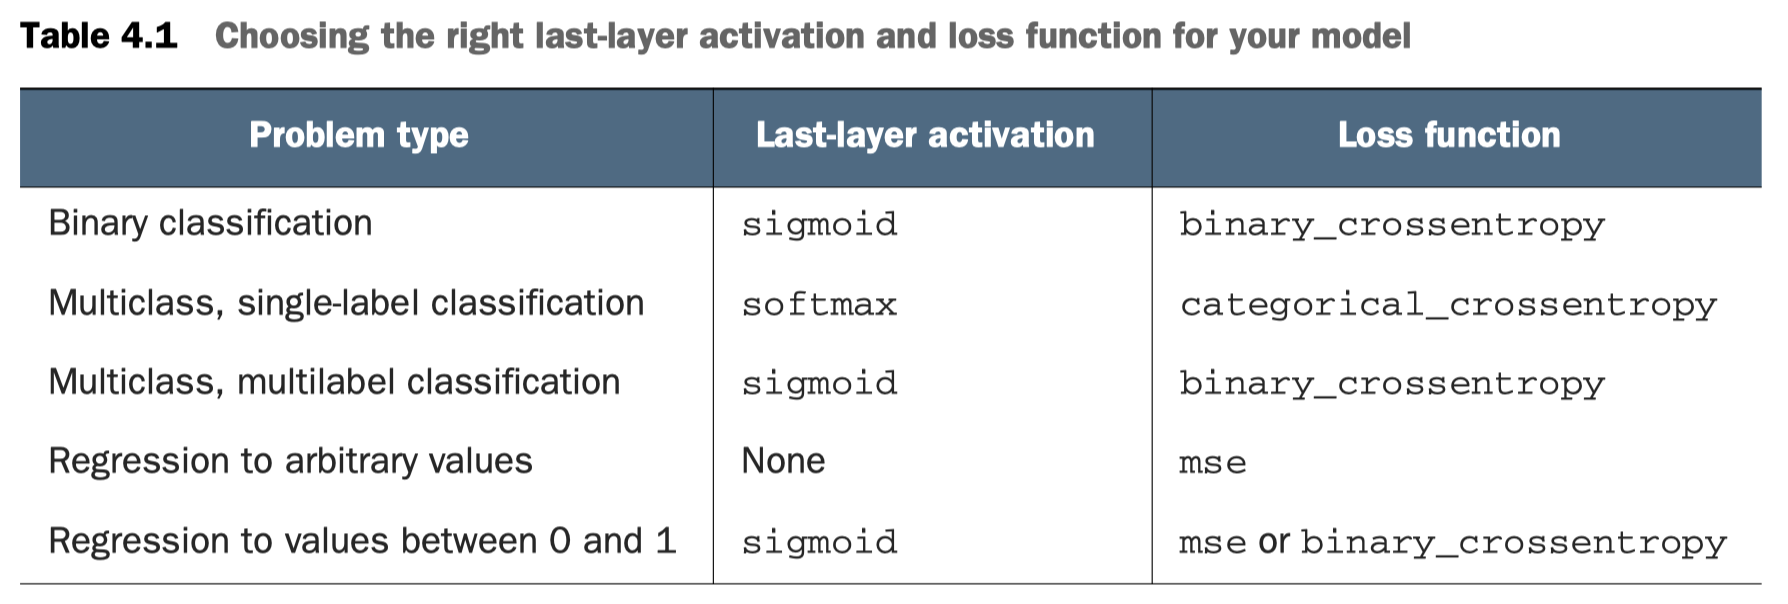

Let's see how many unique labels are in the dataset

In [ ]:
len(set(train_labels))

46

In [13]:
# write preprocessing codes
from tensorflow.keras.utils import to_categorical
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_data = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# y_data = to_categorical(train_labels)
# y_test = to_categorical(test_labels)
y_data = train_labels
y_test = test_labels

print(x_data.shape)
print(x_test.shape)

print(y_data.shape)
print(y_test.shape)

(8982, 10000)
(2246, 10000)
(8982,)
(2246,)


> ### Building the network

In [ ]:
# Do not modify this block
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
# Do not modify this block
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

> ### Validation

* We employ *k-fold cross validation* as validation method of our model.
* **(15pts)** Write a code in the below to perform *10-fold cross validation*.
* **For each fold, save a model at every epoch in your Google Drive.**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Artificial_Intelligence/models/

/content/gdrive/MyDrive/Artificial_Intelligence/models


In [3]:
!ls

fold_0_01.hdf5	    fold_2_12.hdf5	fold_5_02.hdf5	    fold_7_13.hdf5
fold_0_02.hdf5	    fold_2_13.hdf5	fold_5_03.hdf5	    fold_7_14.hdf5
fold_0_03.hdf5	    fold_2_14.hdf5	fold_5_04.hdf5	    fold_7_15.hdf5
fold_0_04.hdf5	    fold_2_15.hdf5	fold_5_05.hdf5	    fold_7_16.hdf5
fold_0_05.hdf5	    fold_2_16.hdf5	fold_5_06.hdf5	    fold_7_17.hdf5
fold_0_06.hdf5	    fold_2_17.hdf5	fold_5_07.hdf5	    fold_7_18.hdf5
fold_0_07.hdf5	    fold_2_18.hdf5	fold_5_08.hdf5	    fold_7_19.hdf5
fold_0_08.hdf5	    fold_2_19.hdf5	fold_5_09.hdf5	    fold_7_20.hdf5
fold_0_09.hdf5	    fold_2_20.hdf5	fold_5_10.hdf5	    fold_7_history.log
fold_0_10.hdf5	    fold_2_history.log	fold_5_11.hdf5	    fold_8_01.hdf5
fold_0_11.hdf5	    fold_3_01.hdf5	fold_5_12.hdf5	    fold_8_02.hdf5
fold_0_12.hdf5	    fold_3_02.hdf5	fold_5_13.hdf5	    fold_8_03.hdf5
fold_0_13.hdf5	    fold_3_03.hdf5	fold_5_14.hdf5	    fold_8_04.hdf5
fold_0_14.hdf5	    fold_3_04.hdf5	fold_5_15.hdf5	    fold_8_05.hdf5
fold_0_15.hdf5	    fold_3_05.hdf5	fold_5

In [ ]:
# write a code for 10-fold cross validation here
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

kf = KFold(n_splits=10)
for idx, (train_index, test_index) in enumerate(kf.split(x_data)):
  x_train = x_data[train_index,:]
  x_val = x_data[test_index,:]
  y_train = y_data[train_index]
  y_val = y_data[test_index]
  files_root = '/content/gdrive/MyDrive/Artificial_Intelligence/models/'
  logger_filepath = files_root + f'fold_{idx}_' + 'history.log'
  csv_logger = CSVLogger(logger_filepath)
  filepath = files_root + f'fold_{idx}_'+'{epoch:02d}.hdf5'
  modelckpt = ModelCheckpoint(filepath=filepath)
  history = model.fit(
      x_train,
      y_train,
      epochs=20,
      validation_data=(x_val, y_val),
      callbacks=[modelckpt, csv_logger])


Epoch 1/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1644 - accuracy: 0.9616 - val_loss: 0.0745 - val_accuracy: 0.9666
Epoch 2/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1403 - accuracy: 0.9631 - val_loss: 0.1132 - val_accuracy: 0.9577
Epoch 3/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1106 - accuracy: 0.9618 - val_loss: 0.1265 - val_accuracy: 0.9611
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1084 - accuracy: 0.9623 - val_loss: 0.1699 - val_accuracy: 0.9555
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1012 - accuracy: 0.9621 - val_loss: 0.1974 - val_accuracy: 0.9600
Epoch 6/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1038 - accuracy: 0.9621 - val_loss: 0.2312 - val_accuracy: 0.9511
Epoch 7/20
253/253 [==============================] - 1s 4ms/step - loss: 0.0878 - accuracy: 0.9630 - val_loss: 0.4093 - val_accuracy: 0.9511
Epoch 

* **(10pts)** Plotting the training and validation accuracy
  * To obtain the validation accuracy at the end of every epoch, just average the performances of all folds.

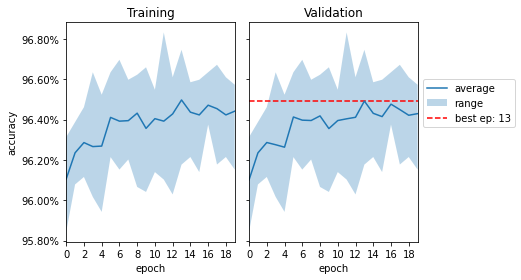

In [ ]:
# write a code for plotting the training and validation accuracy
from keras.models import load_model
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import MaxNLocator

files_root = '/content/gdrive/MyDrive/Artificial_Intelligence/models/'

accuracy = pd.DataFrame()
val_accuracy = pd.DataFrame()
for idx in range(10):
  logger_filepath = os.path.join(files_root, f'fold_{idx}_history.log')
  log_data = pd.read_csv(logger_filepath, engine='python')
  accuracy[f'fold_{idx}'] = log_data['accuracy']
  val_accuracy[f'fold_{idx}'] = log_data['val_accuracy']

accuracy['average'] = accuracy.mean(axis=1)
accuracy['min'] = accuracy.min(axis=1)
accuracy['max'] = accuracy.max(axis=1)

val_accuracy['average'] = accuracy.mean(axis=1)
val_accuracy['min'] = accuracy.min(axis=1)
val_accuracy['max'] = accuracy.max(axis=1)

fg, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.plot(accuracy['average'], label='average')
ax1.fill_between(range(accuracy.shape[0]),accuracy['min'],accuracy['max'], alpha=0.3, label='range')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
yticks = mtick.PercentFormatter(1.0)
ax1.yaxis.set_major_formatter(yticks)
ax1.set_xlim((0,19))

best_epoch = val_accuracy['average'].argmax()

ax2.plot(val_accuracy['average'], label='average')
ax2.fill_between(range(val_accuracy.shape[0]),val_accuracy['min'],val_accuracy['max'], alpha=0.3, label='range')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.hlines(val_accuracy['average'].max(), 0, 20, linestyles='dashed', color='red', label=f'best ep: {best_epoch}')
ax2.set_xlim((0,19))
ax1.get_shared_y_axes().join(ax1, ax2)
ax1.set_title('Training')
ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
ax1.set_ylabel('accuracy')

ax2.set_title('Validation')

fg.tight_layout()
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()


From the plot we can see that epoch 13 provided on average the best accuracy in validation. 

> ### Inference

* Find the best performance model (i.e., the best epoch showing the highest validation accuracy averaged over folds) by seeing the performance plot.
* **(10pts)** Calculate the accuracy on test set using the 10 models at the best epoch.
  * Here, you should use a majority voting method to get the prediction for a test data point.
  * Specifically, given a test data point, get the predicted class from the trained model on each fold, and then decide the final predicted class by a majority voting.
* **Do not retrain the model.**

In [48]:
# write a code here
import glob
from keras.models import load_model
import pandas as pd
import numpy as np

models=[]
files = glob.glob('/content/gdrive/MyDrive/Artificial_Intelligence/models/*_13.hdf5')
for file in files:
  models.append(load_model(file))

predictions = pd.DataFrame()
for idx, model in enumerate(models):
  p = model.predict(x_test)
  predictions[f'fold_{idx}'] = np.argmax(p, axis=1)

predictions['Majority'] = predictions.mode(axis=1)[0].astype(int) # compute the mode in each row and take first element if mode returns more than one element
predictions['Real'] = y_test
predictions['Correct'] = predictions['Majority'] == predictions['Real'] # compare majority voting to ground truth
acc = predictions['Correct'].astype(int).sum() / predictions.shape[0] # convert boolean to integer (1 - Truth, 0 - False), sum it and divide by number of cases
print(f'Accuracy: {acc}')

71/71 [==============================] - 0s 3ms/step
Accuracy: 0.6838824577025824


* **(5pts)** Compare the accuracy above with the performance from a single model at the best epoch from any fold, and discuss the difference between those accuracies.

In [50]:
# write a code here

results = models[0].evaluate(x_test, y_test)
print(f'Accuracy = {results[1]}')

71/71 [==============================] - 0s 4ms/step - loss: 23.3045 - accuracy: 0.6714
Accuracy = 0.6714158654212952


As we can see with majority voting we were able to achieve higher accuracy. There is a chance that for specific data (similar to which given model was trained) singular model will achieve higher accuracy then the majority voting system. However, in general, majority voting tries to fight bias of given model and achieve better generalization, because all of them were trained on slightly different datasets they might respond differently to the same input. If we choose majority voting it means more models would classify data this way, we can also use the number of models which voted for the most popular answer as a confidence of our model, i.e. if model would choose A 9 times and B 1 time it means with 90% confidence it thinks it should be A. If model would choose A 6 times and B 4 times it means model is not sure whether to classify data as A or B (it is less confident). 